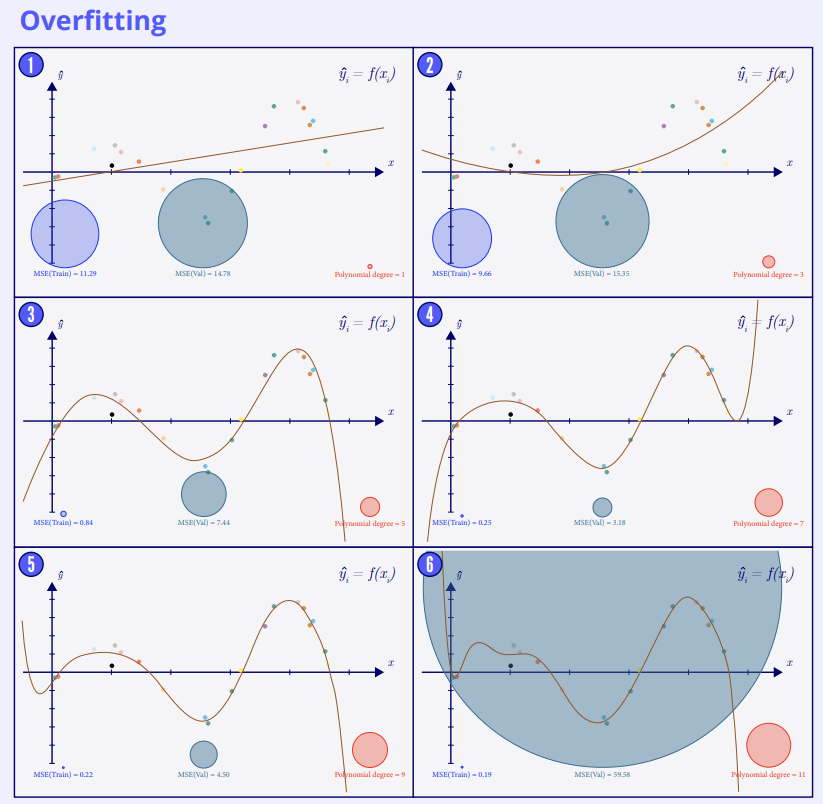

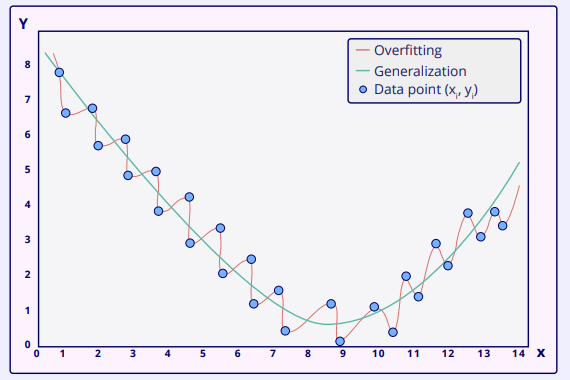

In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [9]:
#Loading Datasets 
X, y = datasets.load_iris(return_X_y=True)
print(X.shape, y.shape)

(150, 4) (150,)


In [12]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [14]:
#Training the Model 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test)
y_pred

array([ 1.31146135,  1.33725388,  1.7759539 ,  0.05904711,  1.26770139,
        0.03592249, -0.06421803, -0.1094503 ,  1.18445058,  1.9695118 ,
        1.05954398,  0.00398657,  2.08493497,  1.29953629,  0.23058152,
        0.8533216 ,  2.29559853, -0.0072056 ,  1.76972637,  1.22492762,
        1.13185592,  1.31367393,  1.30117775,  1.21766624,  2.18737961,
       -0.07982798,  1.59957065,  1.08533651,  1.91408009,  0.02031254])

In [17]:
#Printing the accuracy of the model
score = lr.score(X_test, y_test)
score

0.9277738041355544

## HoldOut Cross Validation or Train-Test Split

#### This cross-validation procedure randomly divides the entire dataset into a training dataset and a validation dataset. Generally, approximately 70% of the whole dataset is utilized as a training set, and the leftover 30% is taken as a validation dataset.
#### The advantage of this method is that we only need to divide the dataset into the training and validation sets once. The machine learning model will only need to be trained once based on the training dataset, allowing for quick execution.

In [20]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
iris = load_iris()
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [25]:
 X = iris.data 
 y = iris.target
 print(X.shape, y.shape)
 print("Size of Datasets:", len(X))

(150, 4) (150,)
Size of Datasets: 150


In [26]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [28]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [29]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = logreg.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [33]:
#Printing the accuracy of the model
print("Accuracy score for the training datasets:", accuracy_score(logreg.predict(X_train), y_train))

print("Accuracy score for the testing datasets:", accuracy_score(y_pred, y_test))

Accuracy score for the training datasets: 0.975
Accuracy score for the testing datasets: 1.0


`## K-Fold Cross Validation`

In [35]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

iris = load_iris()

In [36]:
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [37]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [41]:
#Performing the logistic regression on training datasets
logreg.fit(X, y)

e:\Python\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
kf = KFold(n_splits=5, shuffle=True, random_state=1234) 
score = cross_val_score(logreg, X, y, cv=kf, scoring='accuracy')

print("KFold Cross Validation Score:", score)
print("Mean KFold Cross Validation Score:", score.mean())   

KFold Cross Validation Score: [1.         0.96666667 0.96666667 0.9        1.        ]
Mean KFold Cross Validation Score: 0.9666666666666668


`# Stratified KFold Cross Validation`

In [42]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [43]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [44]:
X = iris.data
y = iris.target
print("Size of the dataset:", len(X))

Size of the dataset: 150


In [45]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [46]:
logreg.fit(X, y)

e:\Python\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
score = cross_val_score(logreg, X, y, cv=skf, scoring='accuracy')   
print("Stratified KFold Cross Validation Score:", score)
print("Mean Stratified KFold Cross Validation Score:", score.mean())    

Stratified KFold Cross Validation Score: [0.96666667 0.96666667 0.93333333 1.         0.93333333]
Mean Stratified KFold Cross Validation Score: 0.96


`# Leave P Out Cross Validation`

#### A thorough cross-validation method called LeavePOut cross-validation uses the n-p samples for training the model and the leftover p-samples as the validation dataset.

#### Assume that the dataset contains 100 samples. If we choose p=10, 10 data entries will be utilized as the validation dataset for each iteration, while the rest 90 samples will constitute the training dataset.

#### This procedure is repeatedly executed until the entire dataset has been split into an n-p training sample dataset and a validation dataset of p-samples.

#### Every data sample is utilized for training and validation.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, LeavePOut

In [52]:
iris = load_iris()
logreg = LogisticRegression()   

In [53]:
leave_pout = LeavePOut(p=2)
leave_pout.get_n_splits(X)

11175

In [54]:
tree = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1) 
score = cross_val_score(tree, X, y, cv=leave_pout, scoring='accuracy')
print("LeavePOut Cross Validation Score:", score)
print("Average Cross Validation Score:", score.mean())

LeavePOut Cross Validation Score: [1. 1. 1. ... 1. 1. 1.]
Average Cross Validation Score: 0.9501565995525727


`# Leave One Out Cross Validation`

#### This exhaustive cross-validation method, known as "LeaveOneOut cross-validation", uses the n-1 samples as the training dataset and the remaining 1 sample point as the validation dataset.

#### Assume that the dataset contains 100 samples. Following then, one value will be utilised as a validation dataset for each iteration, while the rest 99 samples will serve as the training dataset. As a result, the procedure is repeated until each sample in the dataset has served as a validation sample.

In [55]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut

#Loading Data 
iris = load_iris()
X = iris.data
y = iris.target 

print("Size of the dataset:", len(X))   

#Splitting the dataset using LeaveOneOut Cross Validation
leave_oneout = LeaveOneOut()

#Creating Random Forest Classifier 

tree = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1)
score = cross_val_score(tree, X, y, cv = leave_oneout)

#Printing Accuracies 
print("LeaveOneOut Cross Validation Score:", score)
print("Average Cross Validation Score:", score.mean())

Size of the dataset: 150
LeaveOneOut Cross Validation Score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average Cross Validation Score: 0.9266666666666666


# Visualizing the Cross Validation Models 

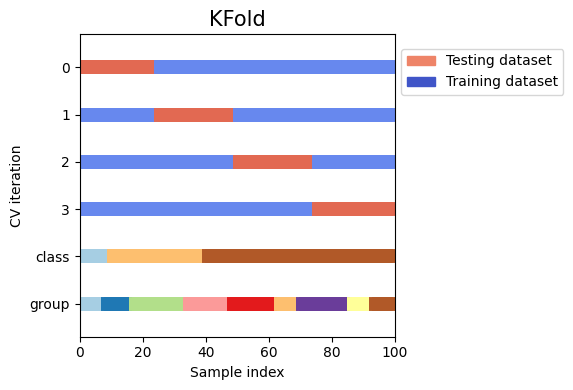

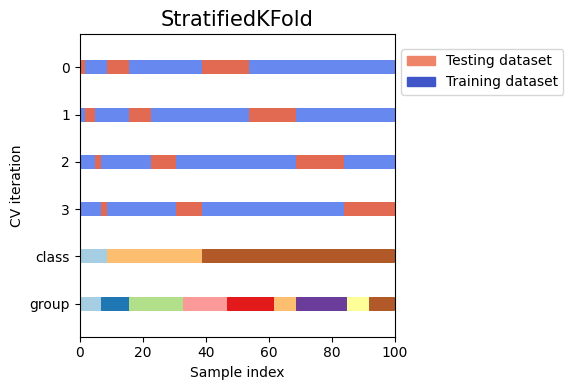

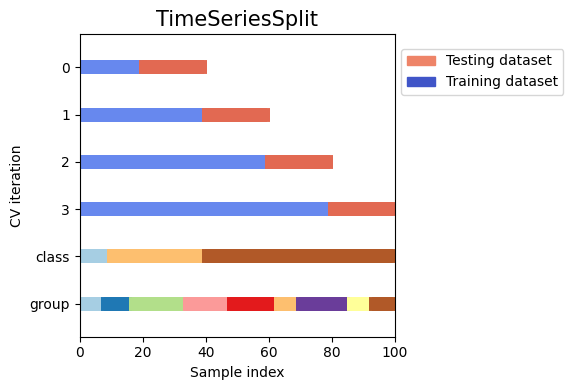

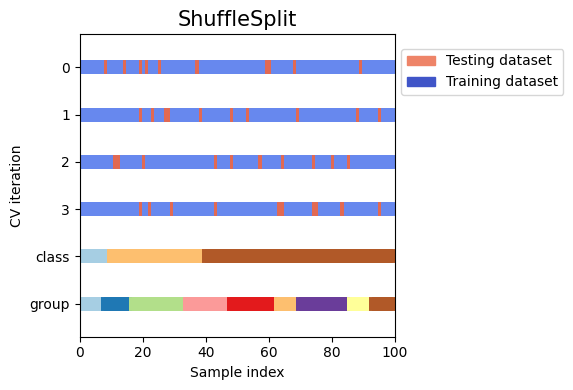

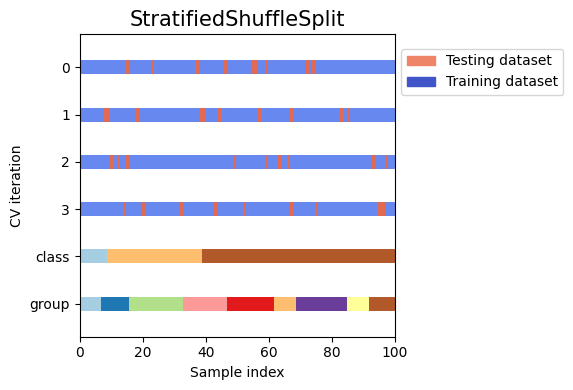

In [56]:
# Python program to visualize splits of the dataset in various cross-validation methods  
  
# Importing required libraries  
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.patches import Patch  
from sklearn.model_selection import (  
    KFold,  
    StratifiedKFold,  
    TimeSeriesSplit,  
    ShuffleSplit,  
    StratifiedShuffleSplit  
)  
  
# Creating a list of cross-validation methods offered by sklearn  
cvm = [  
    KFold,  
    StratifiedKFold,  
    TimeSeriesSplit,  
    ShuffleSplit,  
    StratifiedShuffleSplit  
]  
  
rng = np.random.RandomState(1475)  
n_splits = 4  
cmap_data = plt.cm.Paired  
cmap_cv = plt.cm.coolwarm  
  
  
# Creating random datasets   
n_data = 100  
X = rng.randn( 100, 10 )  
  
# Creating classes for dependent feature y  
percentiles_classes = [0.1, 0.3, 0.6]  
y = np.hstack([ [ind] * int(100 * percentile) for ind, percentile in enumerate( percentiles_classes ) ])  
  
# Generate uneven groups of data  
group = rng.dirichlet( [2] * 10 )  
groups = np.repeat(np.arange(10), rng.multinomial(100, group))  
  
# Creating a function to plot the indices of data by a certain cross-validation method  
def plot_indices(cvm, X, y, p_group, axis, n_splits, lw = 10):  
    """This function will create a dummy plot of the indices of the cross-validation method cvm"""  
  
    # Creating the training/testing visualization for each cross validation split of the dataset  
    for ind, (r, t) in enumerate( cvm.split(X = X, y = y, groups = p_group) ):  
        # Giving the indices the training / test group  
        index = np.array( [np.nan] * len(X) )  
        index[t] = 1  
        index[r] = 0  
  
        # Visualizing the results of training/testing data  
        axis.scatter( range(len(index)), [ind + 0.5] * len(index), c = index, marker = "_", lw = lw, cmap = cmap_cv, vmin = -0.2, vmax = 1.2 )  
  
    # Ploting the classes and groups of our dataset on the same graph  
    axis.scatter( range(len(X)), [ind + 1.5] * len(X), c = y, marker = "_", lw = lw, cmap = cmap_data )  
  
    axis.scatter( range(len(X)), [ind + 2.5] * len(X), c = p_group, marker = "_", lw = lw, cmap = cmap_data )  
  
    # Formatting the graphs to make them more readable   
    yticklabels = list(range(n_splits)) + ["class", "group"]  
    axis.set( yticks = np.arange(n_splits + 2) + 0.5, yticklabels = yticklabels, xlabel = "Sample index", ylabel = "CV iteration", ylim = [n_splits + 2.2, -0.2], xlim = [0, 100] )  
    axis.set_title( f"{type(cvm).__name__}", fontsize = 15 )  
    return axis  
  
  
for cv in cvm:  
    current_cv = cv(n_splits = n_splits)  
    figure, axis = plt.subplots(figsize=(8, 4))  
      
      
    plot_indices(current_cv, X, y, groups, axis, n_splits)  
  
    axis.legend( [Patch(color = cmap_cv(0.8)), Patch(color = cmap_cv(0.02))], ["Testing dataset", "Training dataset"], loc = (1.02, 0.8) )  
    # Adjusting the position of legends of the graphs  
    plt.tight_layout()  
    figure.subplots_adjust(right = 0.5)  
    plt.show()  